# CIRCOS

## Candidate mitochondrial contigs of *Ophiosphaerella* spp. compared to mtDNA of *P. nodorum*


### **Summary:**

**1. Obtained the *reference* mtDNA of *P. nodorum* from the JGI-MycoCosm**
**2. `BLASTn`-ed *Ophiosphaerella* spp. against the *reference* mtDNA: **

```bash
[nathalia@pete] $  makeblastdb -in Stano_mito.fasta -dbtype nucl -parse_seqids -out Stano
```

and...

```
#!/bin/bash
#SBATCH -p batch
#SBATCH -t 120:00:00
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=32
#SBATCH --mail-user=ngrafgr@okstate.edu
#SBATCH --mail-type=begin,end

module load blast+

export DB=/scratch/nathalia/NGG_Dissertation/Ophiosphaerella/4_MITOCHONDRIAL_GENOMES/data
export GENOMES=/scratch/nathalia/NGG_Dissertation/Ophiosphaerella/1_GENOMES/analyses/3_FILTERING/best_assemblies

blastn -query ${GENOMES}/atcc*.fasta -db ${DB}/Stano -num_threads 32 -max_target_seqs 1 -evalue 1e-3 -out ../atcc_mitochondrial_blastn_out.txt -outfmt 6
```

```bash
[nathalia@pete] $  sbatch blastn_atcc.sbatch
Submitted batch job 72059
```

repeated 10x...

**3. Parsed `BLASTn` outputs to create `karyotype` and `links` files for each isolate.**

```python
import glob, os
blasts=glob.glob('*_out.txt')
```

```python
for file in blasts:
    name=file.split('_')[0]
    with open(file,'r') as f:
        print('Opened '+file)
        contig_set=set()
        for line in f:
            line=line.rstrip().split('\t')
            
            contig="_".join(line[0].split('_')[1:])
            #print(contig)
            contig_set.add(contig)
    print('Got', len(contig_set),' contigs: ',contig_set)
    print('Done with '+file)
    i=2
    with open('../2_CIRCOS/circos_ribbon_'+name+'/data/karyotype_'+name+'.txt','w') as out:
        out.write('chr - hs1 P._nodorum_Mitochondrial_genome 0 49761 chr1\n')
        for item in contig_set:
            item_len=item.split('_')[2]
            out.write('chr - hs'+str(i)+' '+item+' 0 '+str(item_len)+' chr'+str(i)+'\n')
            i+=1
    print('Done writing '+out.name)

# Run this block of code once...
```

```python
for file in blasts:
    name=file.split('_')[0]
    script='cp -r '+file+' ../2_CIRCOS/circos_ribbon_'+name+'/data/'+name+'_links.txt'
    os.system(script)
```
**4. Manual labor to parse the `blast_out.txt` files into `links` file (excluded alignments with less than 100bp, and extremely long contigs with one/two small aligments).**  
**5. Once a test figure was optimized, copied the `*.conf` files into each directory, and further manually modified them.**

In [16]:
pwd

'/Users/grachetng/Bioinformatics/circos'

In [14]:
import glob

In [18]:
print('%%bash')
for d in glob.glob('circos_ribbon_*/'):
    print('cd '+d)
    print('circos')
    print('cd ../')

%%bash
cd circos_ribbon_aus58/
circos
cd ../
cd circos_ribbon_tx14/
circos
cd ../
cd circos_ribbon_atcc/
circos
cd ../
cd circos_ribbon_iscc16f/
circos
cd ../
cd circos_ribbon_bcgcc2/
circos
cd ../
cd circos_ribbon_hcw2/
circos
cd ../
cd circos_ribbon_ky162/
circos
cd ../
cd circos_ribbon_ow11/
circos
cd ../
cd circos_ribbon_tx25a/
circos
cd ../
cd circos_ribbon_iscc14b/
circos
cd ../
cd circos_ribbon_ks28/
circos
cd ../
cd circos_ribbon_bcgcc2_test/
circos
cd ../


In [19]:
%%bash
cd circos_ribbon_aus58/
circos
cd ../
cd circos_ribbon_tx14/
circos
cd ../
cd circos_ribbon_atcc/
circos
cd ../
cd circos_ribbon_iscc16f/
circos
cd ../
cd circos_ribbon_bcgcc2/
circos
cd ../
cd circos_ribbon_hcw2/
circos
cd ../
cd circos_ribbon_ky162/
circos
cd ../
cd circos_ribbon_ow11/
circos
cd ../
cd circos_ribbon_tx25a/
circos
cd ../
cd circos_ribbon_iscc14b/
circos
cd ../
cd circos_ribbon_ks28/
circos
cd ../
cd circos_ribbon_bcgcc2_test/
circos
cd ../

debuggroup summary 0.15s welcome to circos v0.69-6 31 July 2017 on Perl 5.018004
debuggroup summary 0.15s current working directory /Users/grachetng/Bioinformatics/circos/circos_ribbon_aus58
debuggroup summary 0.15s command /usr/local/Cellar/circos/0.69-6_1/libexec/bin/circos [no flags]
debuggroup summary 0.15s guessing configuration file
debuggroup summary 0.16s found conf file /Users/grachetng/Bioinformatics/circos/circos_ribbon_aus58/circos.conf
debuggroup summary 0.43s debug will appear for these features: output,summary
debuggroup summary 0.43s bitmap output image ./circos.png
debuggroup summary 0.43s SVG output image ./circos.svg
debuggroup summary 0.43s parsing karyotype and organizing ideograms
debuggroup summary 0.44s karyotype has 5 chromosomes of total size 117,938
debuggroup summary 0.44s applying global and local scaling
debuggroup summary 0.45s allocating image, colors and brushes
debuggroup summary 2.33s drawing 5 ideograms of total size 117,938
debuggroup summary 2.33s 

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
%matplotlib inline

# *O. narmari*

(-0.5, 2999.5, 2999.5, -0.5)

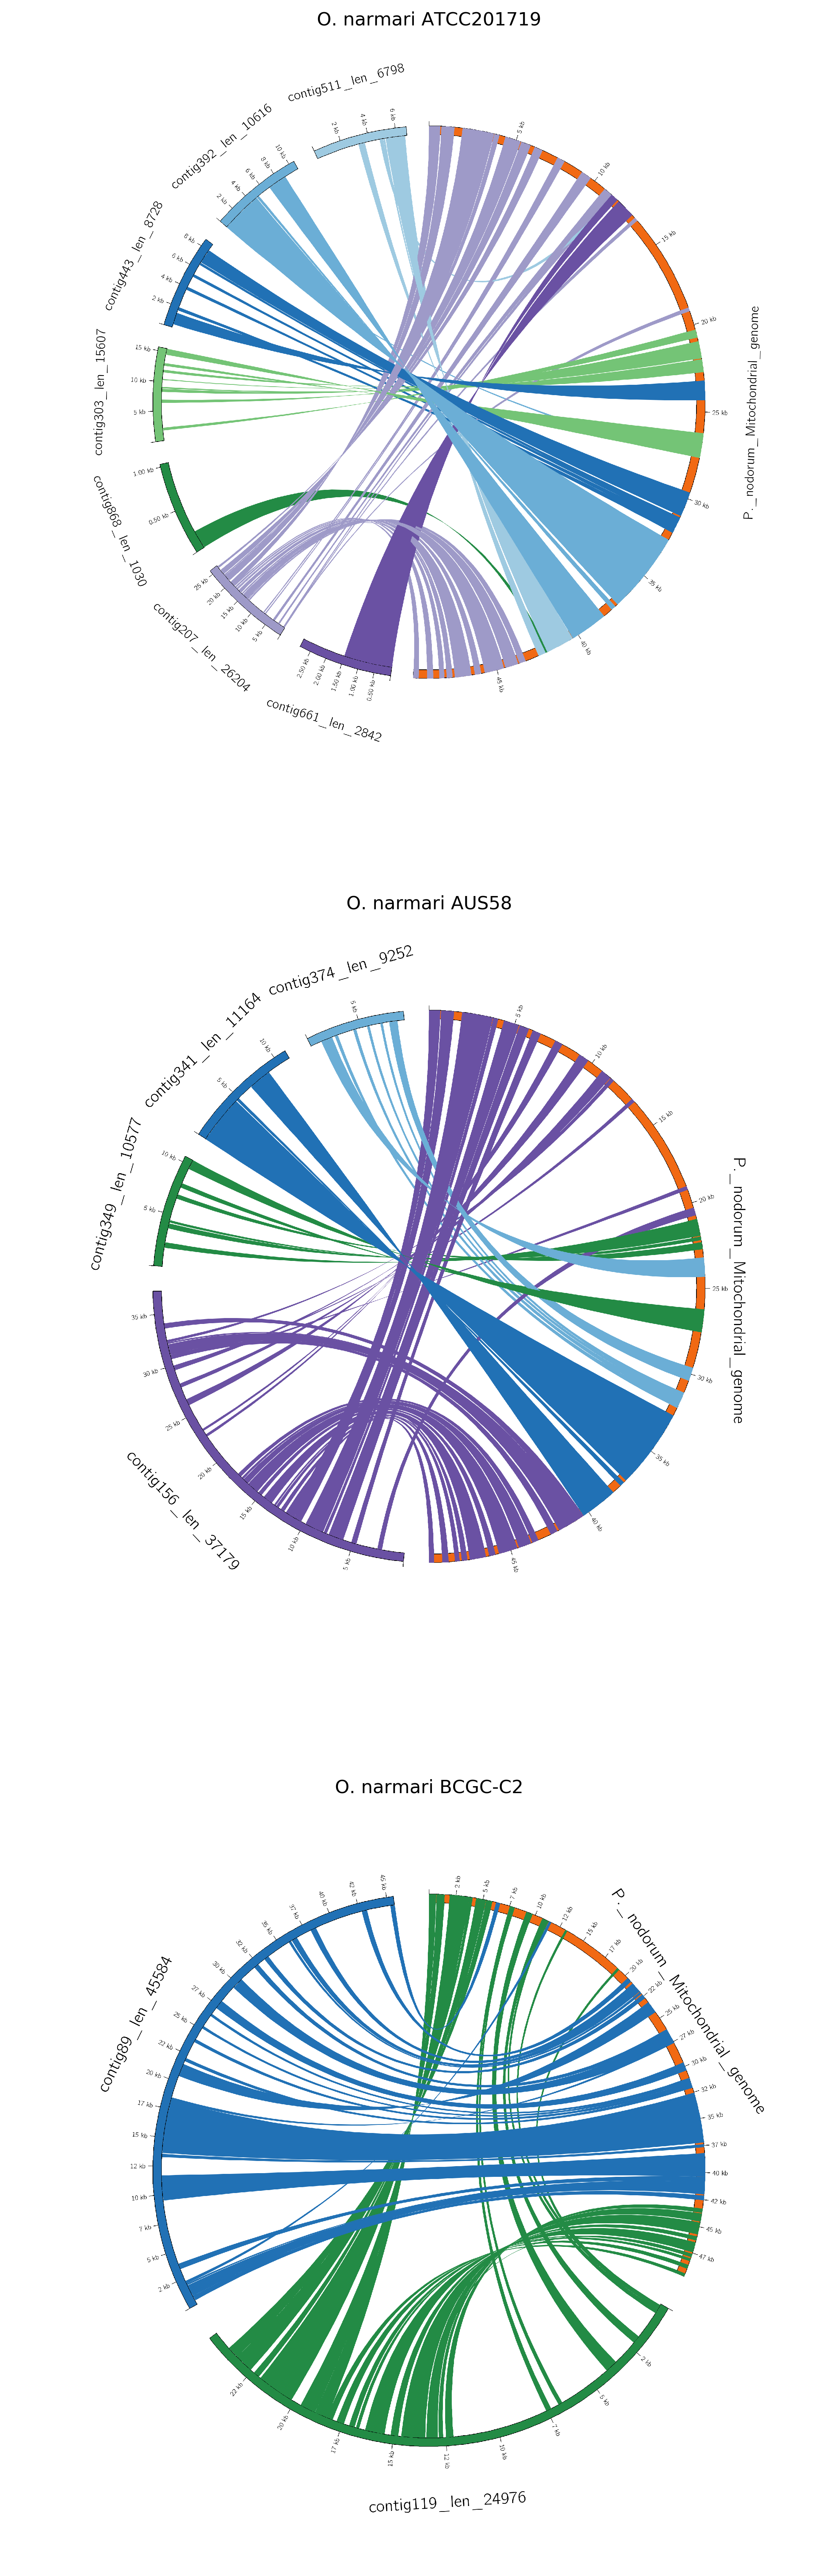

In [22]:
img1=mpimg.imread('circos_ribbon_atcc/circos.png')
img2=mpimg.imread('circos_ribbon_aus58/circos.png')
img3=mpimg.imread('circos_ribbon_bcgcc2/circos.png')

plt.rcParams["figure.figsize"] = (60,30)
plt.rcParams["figure.dpi"] = 300
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, sharex=True, sharey=True) 

ax1.set_title('O. narmari ATCC201719')
ax1.imshow(img1)
ax1.axis('off')

ax2.set_title('O. narmari AUS58')
ax2.imshow(img2)
ax2.axis('off')

ax3.set_title('O. narmari BCGC-C2')
ax3.imshow(img3)
ax3.axis('off')

# *O. herpotricha*

(-0.5, 2999.5, 2999.5, -0.5)

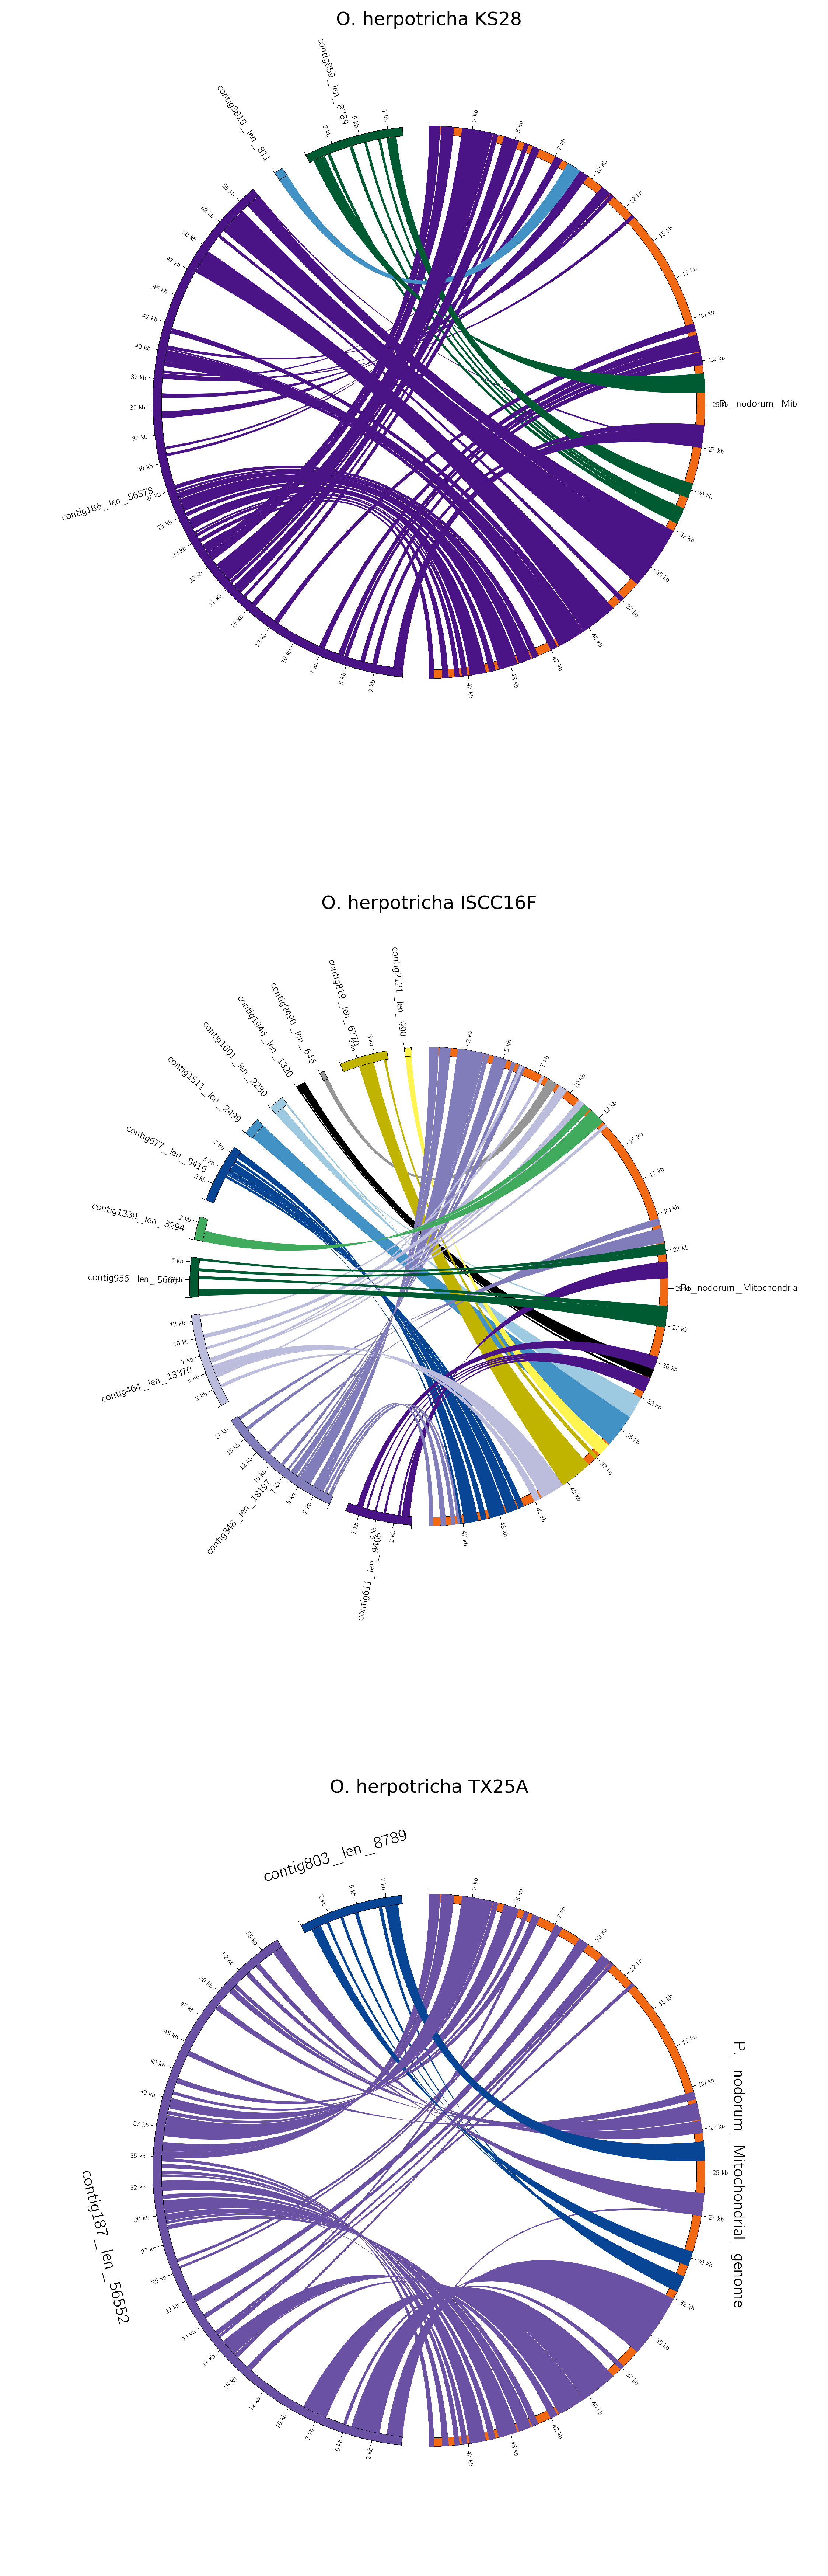

In [23]:
img1=mpimg.imread('circos_ribbon_ks28/circos.png')
img2=mpimg.imread('circos_ribbon_iscc16f/circos.png')
img3=mpimg.imread('circos_ribbon_tx25a/circos.png')

plt.rcParams["figure.figsize"] = (60,30)
plt.rcParams["figure.dpi"] = 300
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, sharex=True, sharey=True) 

ax1.set_title('O. herpotricha KS28')
ax1.imshow(img1)
ax1.axis('off')

ax2.set_title('O. herpotricha ISCC16F')
ax2.imshow(img2)
ax2.axis('off')

ax3.set_title('O. herpotricha TX25A')
ax3.imshow(img3)
ax3.axis('off')



# *O. korrae*

(-0.5, 2999.5, 2999.5, -0.5)

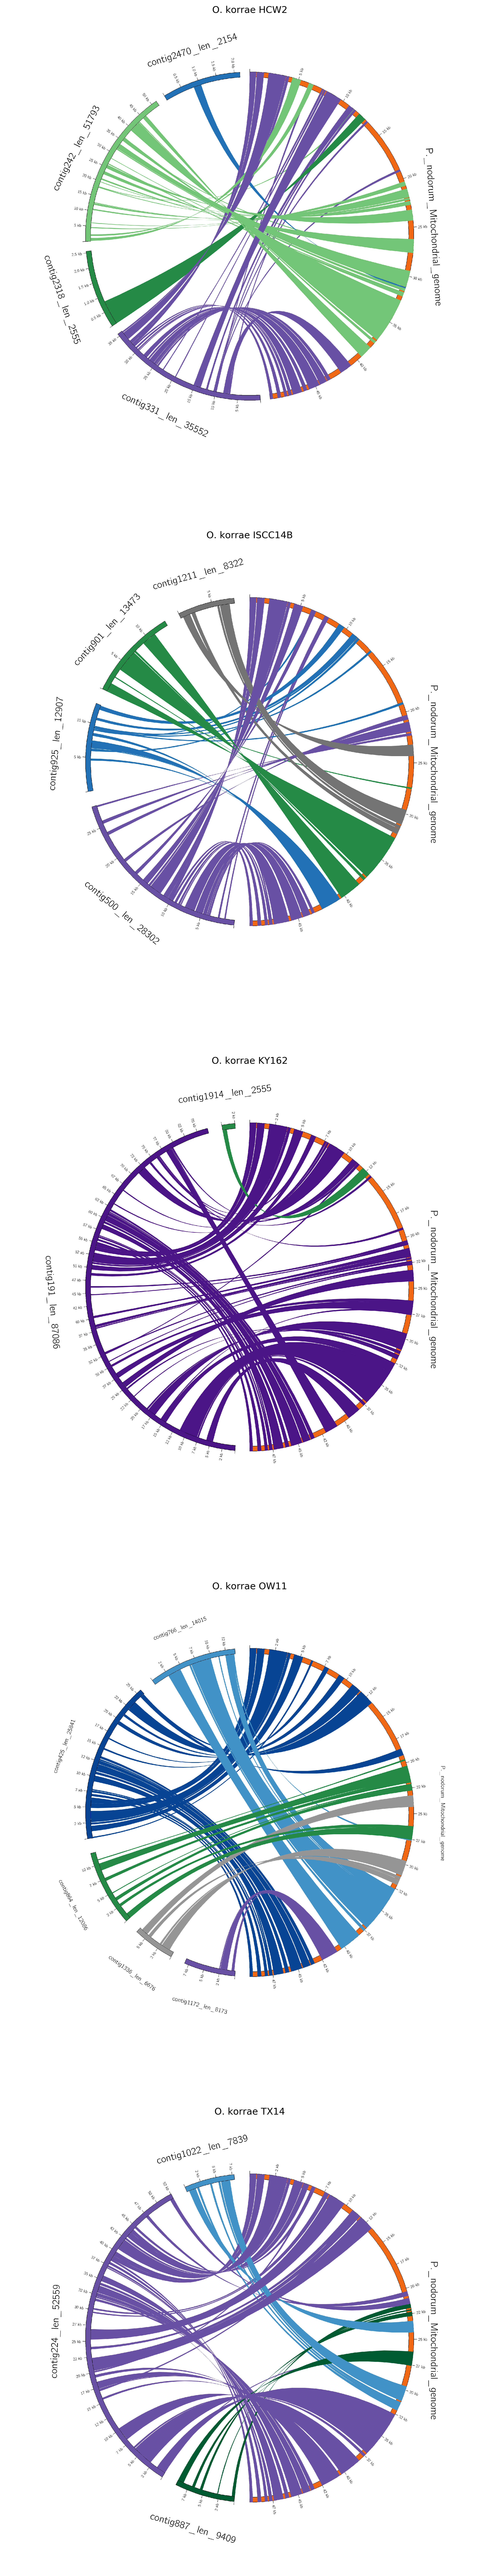

In [24]:
img1=mpimg.imread('circos_ribbon_hcw2/circos.png')
img2=mpimg.imread('circos_ribbon_iscc14b/circos.png')
img3=mpimg.imread('circos_ribbon_ky162/circos.png')
img4=mpimg.imread('circos_ribbon_ow11/circos.png')
img5=mpimg.imread('circos_ribbon_tx14/circos.png')

plt.rcParams["figure.figsize"] = (120,60)
plt.rcParams["figure.dpi"] = 300
fig, ((ax1, ax2,ax3, ax4, ax5)) = plt.subplots(5,1, sharex=True, sharey=True) 

ax1.set_title('O. korrae HCW2')
ax1.imshow(img1)
ax1.axis('off')

ax2.set_title('O. korrae ISCC14B')
ax2.imshow(img2)
ax2.axis('off')

ax3.set_title('O. korrae KY162')
ax3.imshow(img3)
ax3.axis('off')

ax4.set_title('O. korrae OW11')
ax4.imshow(img4)
ax4.axis('off')

ax5.set_title('O. korrae TX14')
ax5.imshow(img5)
ax5.axis('off')



![Gif2](https://media.giphy.com/media/cRMGLCcRZaW6XJQFkc/giphy.gif "alyssa")

*Thank you, Alyssa!*